# Build a Simple Linear Regression

## Context

We have one independent variable (experience years).
We want to predict one dependent variable (salary in thousands of dollars a year)

## Functions

Here, we define 4 functions:
- Predict function: to predict a salary from years of experience. (We found the best coefficients B0 and B1, thanks to the cost function and gradient descent).
- Cost function: return the mean squared error (errors are the difference between the prediction and the real values).
- Gradient descent: find the best coefficients B0 and B1.
- Print graph: used to display scatter plots of values predicted from the model and real values with matplotlib.


In [398]:
def predict(exp, B0, B1):
    return B0 + B1 * exp

def mse_cost_function(error, predictions):
    return np.sum(error ** 2) / (2 * len(predictions))

def gradient_descent(exp, salaries, B0, B1, learning_rate, num_iterations):
    num_samples = len(exp)
    cost_history = []
    for _ in range(num_iterations):
        predictions = predict(exp, B0, B1)
        error = predictions - salaries
        gradient_B0 = np.sum(error) / num_samples
        gradient_B1 = np.sum(error * exp) / num_samples
        B0 -= learning_rate * gradient_B0
        B1 -= learning_rate * gradient_B1
        cost = mse_cost_function(error, predictions)
        cost_history.append(cost)
    return B0, B1, cost_history

def print_graph(exp, salary):
    plt.scatter(exp, salary, label="Real values")
    plt.plot(exp, predict(exp, B0, B1), color='red', label="Linear Regression")
    plt.xlabel("Years of experience")
    plt.ylabel("Salary")
    plt.legend()
    plt.show()

## Train the model

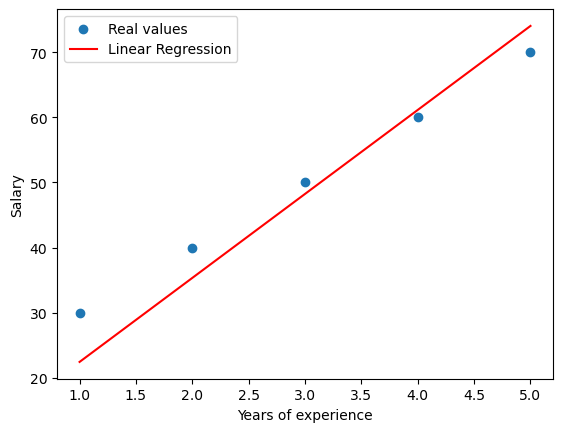

In [399]:
import numpy as np
import matplotlib.pyplot as plt

exp = np.array([1, 2, 3, 4, 5])
salaries = np.array([30, 40, 50, 60, 70])

B0 = 2
B1 = 2
learning_rate = 0.01
num_iterations = 200

B0, B1, cost_history = gradient_descent(exp, salaries, B0, B1, learning_rate, num_iterations)
print_graph(exp, salaries)

## Predict a new value

With our new trained model, we predict a salary from unknown data.
With 30 years of experience, our model predicts a salary of 341k dollars!

In [400]:
new_prediction = predict(30, B0, B1)
print(new_prediction)

396.39219744630975


In [401]:
print(cost_history)

[946.0, 739.6876, 579.2903725600002, 454.586643858736, 357.63030831217765, 282.244237259494, 223.6264659676537, 178.04405203158072, 142.59508759759387, 115.02369287679821, 93.5761961532255, 76.88933127118915, 63.90332480993796, 53.794331956240356, 45.92191363108838, 39.788206358016325, 35.00618181273144, 31.27497249197147, 28.360690428732802, 26.0815160814732, 24.296106763064262, 22.894585607261824, 21.791536588540637, 20.920559003890354, 20.230034246194997, 19.679834986545497, 19.238766964622272, 18.88258029255043, 18.592423486058742, 18.353641662150956, 18.15484228428788, 17.987168893146258, 17.843736520811163, 17.7191927941294, 17.609376746064605, 17.51105358311356, 17.421708499301335, 17.339386391694042, 17.26256725874617, 17.19006933770251, 17.120973805733453, 17.05456624424467, 16.990291134511473, 16.927716483579687, 16.866506325213674, 16.806399342734057, 16.747192250878037, 16.688726877219768, 16.63088011954791, 16.573556138949144, 16.51668029088061, 16.460194407316813, 16.4040

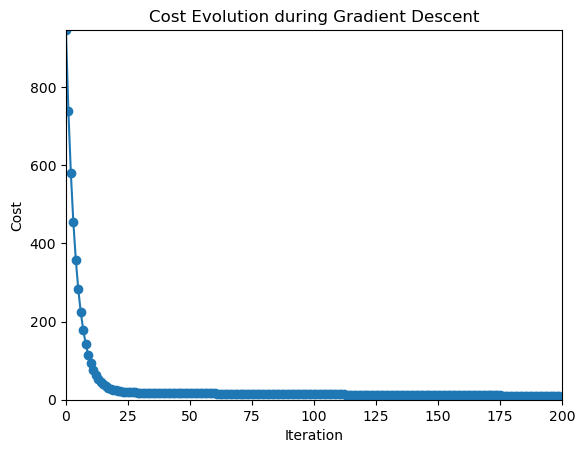

In [402]:
plt.plot(range(num_iterations), cost_history, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Evolution during Gradient Descent')
plt.axis([0, num_iterations, 0, max(cost_history)])
plt.show()
